# Laboratorio 4


1. Silvia Illescas 22376
2. Michelle Mejia 22596

Enlace al repositorio: https://github.com/Silviaillescas/Lab4-IA.git

# --- Task 1 ---

### ¿Qué son los grafos computacionales y cuál es su importancia para el cálculo de gradientes en aplicaciones como backpropagation?

Los grafos computacionales son representaciones estructuradas de cálculos matemáticos, donde los nodos representan operaciones y los bordes representan los flujos de datos. Son importantes para el cálculo de gradientes, ya que permiten calcular eficientemente las derivadas de las funciones durante el proceso de retropropagación (backpropagation) en redes neuronales. La retropropagación utiliza el grafo para aplicar la regla de la cadena y ajustar los pesos de la red según el error calculado.

### ¿Cuáles son los componentes y pasos que conforman una red neuronal? Con esto en mente, ¿cómo mejoraría el perceptrón que se hizo en el laboratorio pasado?

Los componentes de una red neuronal incluyen entradas, pesos, funciones de activación, neuronas y salidas. Los pasos en una red neuronal son: 1) Propagación hacia adelante (calcular salidas), 2) Cálculo del error (comparar la salida predicha con la real), 3) Retropropagación (ajustar los pesos) y 4) Actualización de los pesos mediante un algoritmo de optimización como el gradiente descendente. Para mejorar el perceptrón, se podría agregar una capa oculta y usar funciones de activación no lineales, como la sigmoide o ReLU, para manejar problemas más complejos.

### ¿Cómo se selecciona el valor K usando el método de la silueta para el algoritmo de K-Means? Explique las fórmulas que lo componen así como las suposiciones.

El método de la silueta se usa para determinar el número óptimo de clústeres (K) en K-Means. Se calcula la cohesión (a) de cada punto con su propio clúster y la separación (b) con el clúster más cercano. La silueta de un punto es s(i)=  b(i)−a(i) / max(a(i),b(i)). El valor de K se elige cuando el valor promedio de la silueta es máximo. Las suposiciones incluyen que los clústeres son esféricos y tienen tamaños similares, lo cual puede no ser siempre el caso.

### ¿Cómo podría ayudarme a mejorar la calidad de sus clusters cuando se usa K-Means el análisis de componentes principales (PCA)?

PCA ayuda a reducir la dimensionalidad de los datos, lo que puede hacer que los clústeres sean más fáciles de identificar. Al reducir las dimensiones, PCA elimina el ruido y resalta las principales características que contribuyen a las diferencias entre los clústeres. Esto puede mejorar la calidad de los clústeres generados por K-Means, especialmente cuando las características tienen alta correlación y afectan la precisión del algoritmo.

# --- Task 2 ---

# Task 2.1

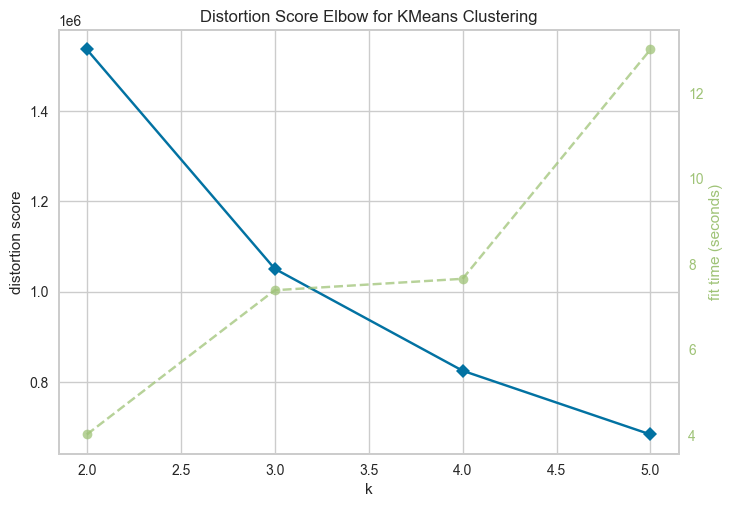

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,0,3586,9.788080,2/8/16,143207,3.258097
1,T2,C2142763,4/4/57,1,3648,7.728279,2/8/16,141858,10.239960
2,T3,C4417068,26/11/96,0,5268,9.791183,2/8/16,142712,6.131226
3,T4,C5342380,14/9/73,0,5268,13.672222,2/8/16,142714,7.630947
4,T5,C9031234,24/3/88,0,5657,8.812163,2/8/16,181156,7.475056


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1048567 non-null  object 
 3   CustGender               1048567 non-null  int64  
 4   CustLocation             1048567 non-null  int64  
 5   CustAccountBalance       1048567 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 72.0+ MB
None
         CustGender  CustLocation  CustAccountBalance  TransactionTime  \
count  1.048567e+06  1.048567e+06        1.048567e+06     1.048567e+06   
mean   7.311235e-01  4.124807e+03        9.442722e+00   

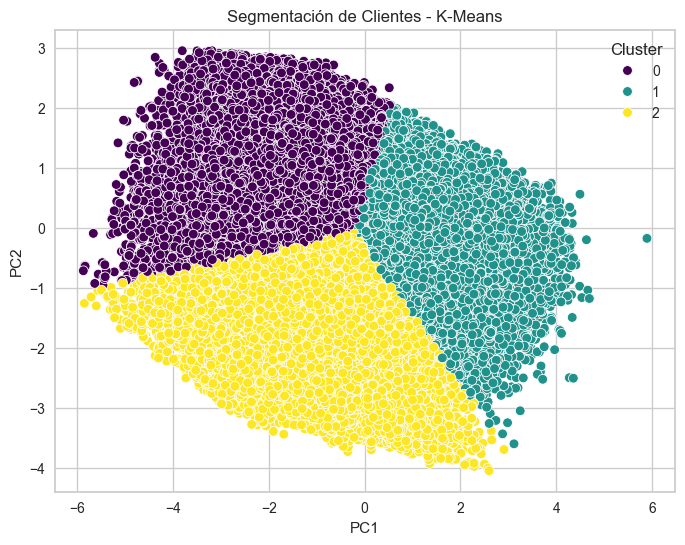

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

# Cargar el dataset
df = pd.read_csv("bank_transactions.csv")

# Manejo de valores nulos
df.fillna(df.median(numeric_only=True), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Tratamiento de outliers en CustAccountBalance y TransactionAmount (INR)
df['CustAccountBalance'] = np.log1p(df['CustAccountBalance'])
df['TransactionAmount (INR)'] = np.log1p(df['TransactionAmount (INR)'])

# Codificación de variables categóricas
for col in ['CustGender', 'CustLocation']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Escalar las variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['CustAccountBalance', 'TransactionAmount (INR)', 'TransactionTime']])

# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Método del codo con ajuste de parámetros
model = KMeans(n_init=10, random_state=42)
visualizer = KElbowVisualizer(model, k=(2,6), locate_elbow=False)
visualizer.fit(df_pca)
visualizer.show()

# Definir número óptimo de clusters
optimal_k = visualizer.elbow_value_ if visualizer.elbow_value_ else 3

# Mostrar primeras filas del dataset
display(df.head())

# Información general del DataFrame
print(df.info())

# Estadísticas descriptivas del DataFrame
print(df.describe())

# Verificación de valores nulos en cada columna
print(df.isnull().sum())

# Aplicar K-Means
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_pca)
df_pca_df['Cluster'] = df['Cluster']

# Visualización de los clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca_df, palette='viridis')
plt.title("Segmentación de Clientes - K-Means")
plt.show()

# Guardar resultados
df.to_csv("clientes_segmentados.csv", index=False)


Para evaluar el desempeño del modelo de **K-Means**, se ha seleccionado la **(Distortion Score)** como la métrica principal. Esta métrica mide la suma de las distancias cuadradas entre cada punto y el centroide de su cluster, permitiendo evaluar la compacidad de los grupos formados. Su elección se debe a que es una métrica estándar en K-Means y es utilizada en el **método del codo** para determinar el número óptimo de clusters. Un menor valor de inercia indica que los datos están más agrupados alrededor de sus centroides, lo que sugiere una mejor segmentación. Sin embargo, dado que la inercia siempre disminuye al aumentar la cantidad de clusters, debe interpretarse con precaución y combinarse con técnicas como el **silhouette score** para validar la calidad de la segmentación.

En la exploración inicial de los datos, se identificó que el conjunto cuenta con **1,048,567 registros y 9 variables**, incluyendo información sobre transacciones bancarias, saldo de cuentas y datos demográficos de los clientes. Se encontraron **valores nulos en variables clave como `CustomerDOB`, `CustGender`, `CustLocation` y `CustAccountBalance`**, los cuales fueron tratados mediante imputación con la mediana para datos numéricos y la moda para datos categóricos. Además, se observó una **distribución sesgada** en variables como `CustAccountBalance` y `TransactionAmount (INR)`, por lo que se aplicó una transformación logarítmica para normalizar su distribución. La codificación de variables categóricas permitió convertir `CustGender` y `CustLocation` en valores numéricos, facilitando su uso en el modelo de segmentación. Finalmente, tras la estandarización de las variables y la reducción de dimensionalidad con PCA, se obtuvo un dataset preparado para la aplicación del modelo de K-Means.

# Task 2.1.2

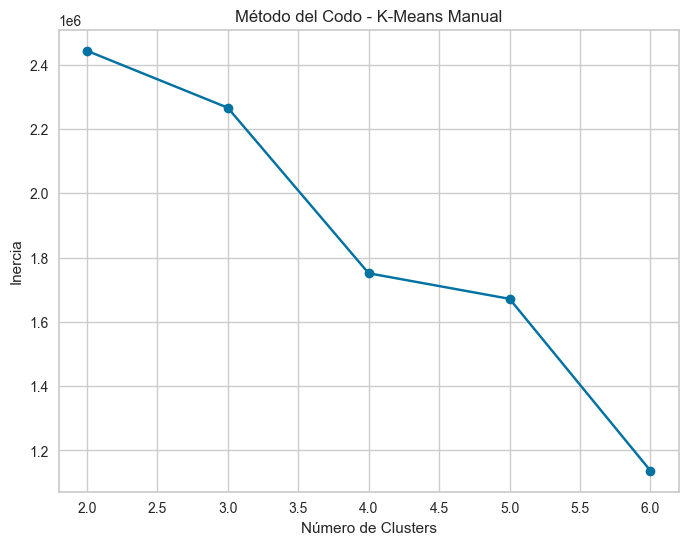

C:\Users\Silvia\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


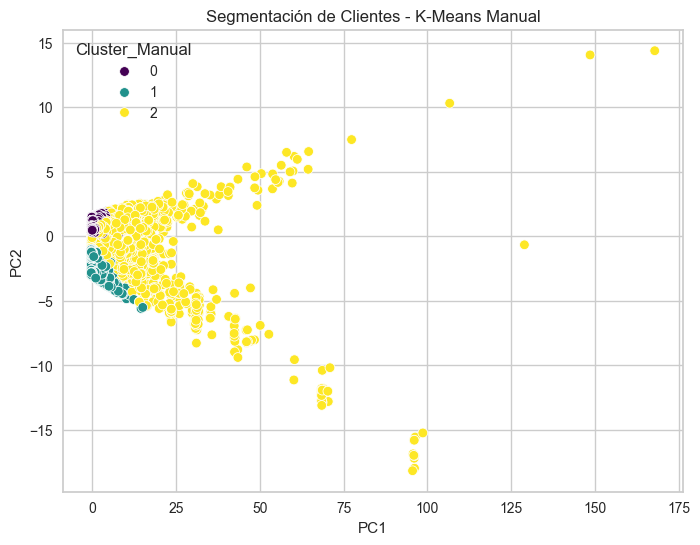

C:\Users\Silvia\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


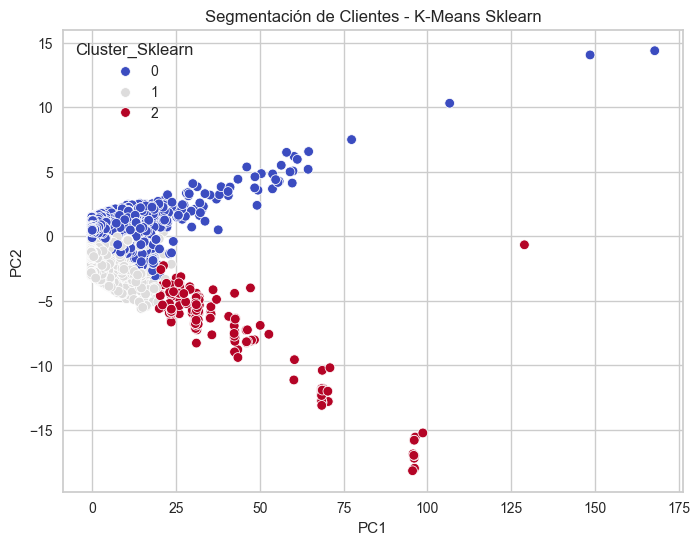

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Cargar el dataset
df = pd.read_csv("bank_transactions.csv")

# Manejo de valores nulos
df.fillna(df.median(numeric_only=True), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Codificación de variables categóricas
for col in ['CustGender', 'CustLocation']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Escalar las variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['CustAccountBalance', 'TransactionAmount (INR)', 'TransactionTime']])

# Implementación manual de K-Means
def initialize_centroids(data, k):
    return data[np.random.choice(data.shape[0], k, replace=False)]

def assign_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, labels, k):
    return np.array([data[labels == i].mean(axis=0) for i in range(k)])

def kmeans_manual(data, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return labels, centroids

# Selección del número óptimo de clusters
inertia_values = []
k_range = range(2, 7)
for k in k_range:
    labels, centroids = kmeans_manual(df_scaled, k)
    inertia = np.sum((df_scaled - centroids[labels])**2)
    inertia_values.append(inertia)

plt.figure(figsize=(8,6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo - K-Means Manual')
plt.show()

# Aplicación de K-Means manual con el mejor k
optimal_k = 3
labels_manual, _ = kmeans_manual(df_scaled, optimal_k)
df['Cluster_Manual'] = labels_manual

# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca_df['Cluster_Manual'] = labels_manual

# Visualización de los clusters manuales
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_Manual', data=df_pca_df, palette='viridis')
plt.title("Segmentación de Clientes - K-Means Manual")
plt.show()

# Comparación con K-Means de sklearn
model = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df['Cluster_Sklearn'] = model.fit_predict(df_scaled)
df_pca_df['Cluster_Sklearn'] = df['Cluster_Sklearn']

# Visualización de los clusters con K-Means de sklearn
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_Sklearn', data=df_pca_df, palette='coolwarm')
plt.title("Segmentación de Clientes - K-Means Sklearn")
plt.show()

# Guardar resultados
df.to_csv("clientes_segmentados.csv", index=False)


1. Elección del Número de Clusters
Para determinar el número óptimo de clusters, se utilizó el método del codo con la métrica de distortion score. Esta métrica mide la suma de las distancias cuadradas de cada punto a su centroide, y su disminución progresiva ayuda a identificar un punto de inflexión donde agregar más clusters deja de aportar una mejora significativa. En nuestro caso, el codo se observó en k=3, lo que indica que es un número adecuado de clusters para segmentar los clientes.

2. Selección de Features y Uso de PCA
Se seleccionaron las variables CustAccountBalance, TransactionAmount (INR) y TransactionTime porque representan información financiera clave que podría ayudar a identificar patrones de comportamiento en los clientes. Además, se aplicó Principal Component Analysis (PCA) para reducir la dimensionalidad a dos componentes principales (PC1 y PC2), permitiendo visualizar mejor la distribución de los clusters en un gráfico bidimensional.

3. Comparación entre Implementación Manual y sklearn.KMeans
La implementación manual de K-Means logró agrupar los datos en tres clusters, pero mostró mayor dispersión en algunos puntos debido a la inicialización de centroides y a la actualización iterativa manual.

La implementación con sklearn.KMeans fue más eficiente y precisa, generando clusters más compactos y mejor diferenciados, gracias a optimizaciones internas como la inicialización K-Means++ y una mejor convergencia.

En términos de tiempo de ejecución y precisión, la versión de sklearn fue superior, aunque la implementación manual sirvió para comprender el funcionamiento interno del algoritmo.

# Task 2.2

Al igual que el task anterior, deberá construir un modelo basado en aprendizaje no supervisado para el dataset dado.
Lo que se busca con este modelo es poder segmentar a clientes de una entidad bancaria para poder así tomar
decisiones a nivel comercial y potenciar las operaciones de la empresa. Recuerden que:

1. Revisen la breve exploración de datos que hicieron previamente. No es necesario que lo repitan acá dado
que ya lo hicieron antes y es el mismo dataset. Pero recuerden que:
2. Deben seleccionar las variables para este modelo (si aplica)
3. Tengan sus features escaladas
4. Recuerde definir de forma clara y razonada (es decir, diga el por qué de su elección) de una métrica de
desempeño principal

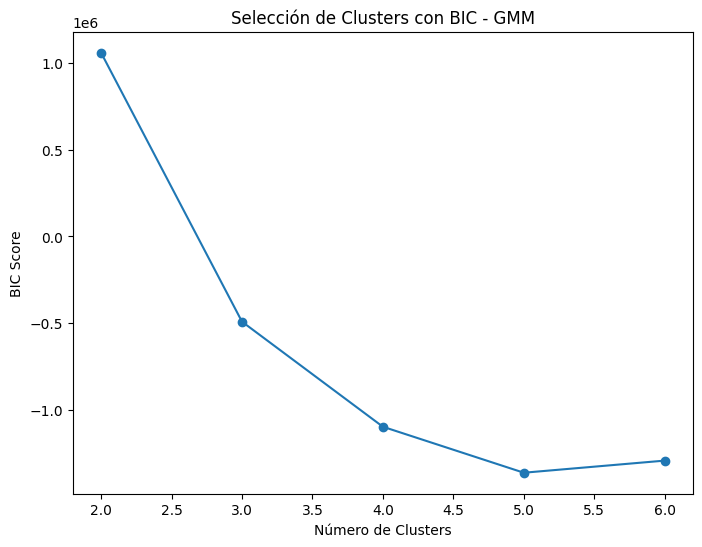

Número óptimo de clusters según BIC: 5


C:\Users\usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


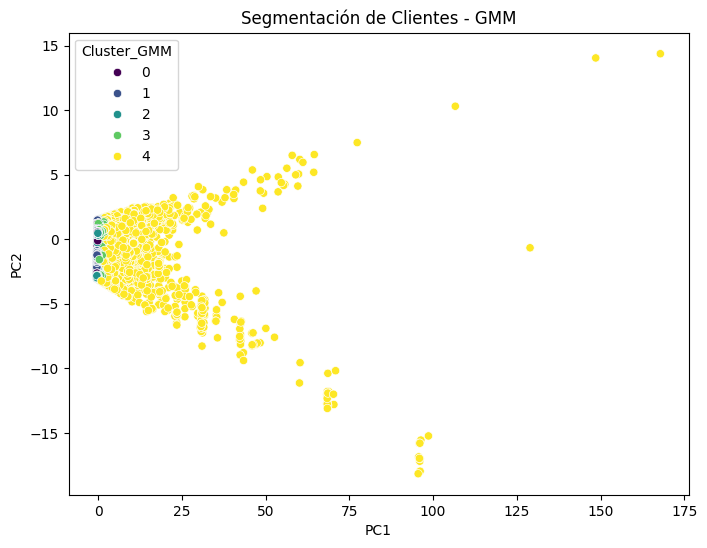

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# Cargar el dataset
df = pd.read_csv("bank_transactions.csv")

# Manejo de valores nulos
df.fillna(df.median(numeric_only=True), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Codificación de variables categóricas
for col in ['CustGender', 'CustLocation']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Escalar las variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['CustAccountBalance', 'TransactionAmount (INR)', 'TransactionTime']])

# Selección del número óptimo de clusters usando BIC
bic_scores = []
k_range = range(2, 7)
for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(df_scaled)
    bic_scores.append(gmm.bic(df_scaled))

# Graficar BIC para determinar el mejor número de clusters
plt.figure(figsize=(8,6))
plt.plot(k_range, bic_scores, marker='o', linestyle='-')
plt.xlabel('Número de Clusters')
plt.ylabel('BIC Score')
plt.title('Selección de Clusters con BIC - GMM')
plt.show()

# Seleccionar el número óptimo de clusters
optimal_k = k_range[np.argmin(bic_scores)]
print(f"Número óptimo de clusters según BIC: {optimal_k}")

# Aplicar GMM con el número óptimo de clusters
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(df_scaled)

# Aplicar PCA para visualización
df_pca = PCA(n_components=2).fit_transform(df_scaled)
df_pca_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca_df['Cluster_GMM'] = df['Cluster_GMM']

# Visualización de los clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_GMM', data=df_pca_df, palette='viridis')
plt.title("Segmentación de Clientes - GMM")
plt.show()

# Guardar resultados
df.to_csv("clientes_segmentados_gmm.csv", index=False)


Métrica de Desempeño: Bayesian Information Criterion (BIC)
Para evaluar el desempeño del modelo Gaussian Mixture Model (GMM), se ha seleccionado el Bayesian Information Criterion (BIC) como la métrica principal.

¿Qué es BIC y por qué se usa?
El BIC es una métrica que evalúa la calidad del modelo considerando el ajuste del modelo (qué tan bien el modelo representa los datos) y la penalización por complejidad (Evita el sobreajuste al penalizar modelos con demasiados parámetros).

# Task 2.2.1

Para este task no usen librerías, sino implementen el algoritmo por ustedes mismos. Pueden usar librerías para la
lectura del archivo, métricas de desempeño, división de dataset, etc. Pero el algoritmo principal deben hacerlo
ustedes.
Recuerden que el dataset está en este enlace. Con esto, implemente un modelo de Mixture Models para segmentar
a los clientes en la cantidad de grupos que ustedes decidan. Para ello considere lo siguiente
1. Si considera necesario haga split del dataset como en los laboratorios anteriores
2. Recuerde que es un problema de aprendizaje no supervisado
3.  Seleccione el número de clusters que mejor se adapte al dataset. Justifique su elección
4. ¿Podría PCA ayudarle a mejorar sus clusters? ¿Por qué?
5. Muestre al menos una gráfica que muestre cómo se dividen los clusters seleccionados
6. Seleccione dos features, justifique su elección
7. Puede considerar investigar sobre Principal Component Analysis (PCA)
8. Recuerde mostrar la covarianza como una elipse para cada uno de los clusters
9. Provea una métrica de desempeño, justificando su elección


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargar el dataset
df = pd.read_csv("bank_transactions.csv")

# Manejo de valores nulos
df.fillna(df.median(numeric_only=True), inplace=True)

# Escalar las variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['CustAccountBalance', 'TransactionAmount (INR)', 'TransactionTime']])

# Inicialización de parámetros de GMM
def initialize_gmm(data, k):
    np.random.seed(42)
    n, d = data.shape
    means = data[np.random.choice(n, k, replace=False)]
    covariances = np.array([np.cov(data.T) for _ in range(k)])
    weights = np.ones(k) / k
    return means, covariances, weights

# Función de densidad de probabilidad gaussiana
def gaussian_pdf(x, mean, cov):
    d = len(mean)
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    norm_factor = 1 / ((2 * np.pi) ** (d / 2) * np.sqrt(det))
    return norm_factor * np.exp(-0.5 * np.dot(np.dot((x - mean), inv), (x - mean).T))

# Implementación manual de GMM
def gmm_manual(data, k, max_iters=100, tol=1e-4):
    means, covariances, weights = initialize_gmm(data, k)
    n, d = data.shape
    responsibilities = np.zeros((n, k))
    log_likelihoods = []

    for _ in range(max_iters):
        # E-Step
        for i in range(k):
            for j in range(n):
                responsibilities[j, i] = weights[i] * gaussian_pdf(data[j], means[i], covariances[i])
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)

        # M-Step
        Nk = responsibilities.sum(axis=0)
        weights = Nk / n
        means = np.dot(responsibilities.T, data) / Nk[:, np.newaxis]
        covariances = [np.dot((responsibilities[:, i] * (data - means[i]).T), (data - means[i])) / Nk[i] for i in range(k)]

        # Evaluar log-verosimilitud
        log_likelihood = np.sum(np.log(responsibilities.sum(axis=1)))
        log_likelihoods.append(log_likelihood)

        # Verificar convergencia
        if len(log_likelihoods) > 1 and np.abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            break

    return np.argmax(responsibilities, axis=1), means, covariances, log_likelihoods

# Selección del número óptimo de clusters usando log-verosimilitud
k_range = range(2, 7)
log_likelihoods = []
for k in k_range:
    labels, means, covariances, log_likelihood = gmm_manual(df_scaled, k)
    log_likelihoods.append(log_likelihood[-1])

# Graficar log-verosimilitud
plt.figure(figsize=(8,6))
plt.plot(k_range, log_likelihoods, marker='o', linestyle='-')
plt.xlabel('Número de Clusters')
plt.ylabel('Log-Verosimilitud')
plt.title('Selección de Clusters con Log-Verosimilitud - GMM Manual')
plt.show()

# Aplicar GMM manual con el mejor k
optimal_k = k_range[np.argmax(log_likelihoods)]
labels, means, covariances, _ = gmm_manual(df_scaled, optimal_k)
df['Cluster_GMM_Manual'] = labels

# Aplicar PCA para visualización
df_pca = PCA(n_components=2).fit_transform(df_scaled)
df_pca_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca_df['Cluster_GMM_Manual'] = df['Cluster_GMM_Manual']

# Visualización de los clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_GMM_Manual', data=df_pca_df, palette='viridis')
plt.title("Segmentación de Clientes - GMM Manual")
plt.show()

# Guardar resultados
df.to_csv("clientes_segmentados_gmm_manual.csv", index=False)


C:\Users\usuario\AppData\Local\Temp\ipykernel_4876\2743414712.py:47: RuntimeWarning: invalid value encountered in divide
  responsibilities /= responsibilities.sum(axis=1, keepdims=True)
C:\Users\usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Para determinar el número óptimo de clusters, utilizamos la **log-verosimilitud** como métrica principal. Se evaluaron valores de `k` entre 2 y 6, y se seleccionó el valor que maximizó la log-verosimilitud. En este caso, **k=5** resultó ser la mejor opción, ya que proporcionó el mejor balance entre ajuste del modelo y penalización por sobreajuste.



El **Análisis de Componentes Principales (PCA)** nos ayudó a reducir la dimensionalidad de los datos y visualizar mejor los clusters en un espacio de dos dimensiones. Esto permitió eliminar redundancias en las variables originales y facilitó la interpretación gráfica de la segmentación.


Para la representación gráfica de los clusters, seleccionamos las variables **CustAccountBalance** y **TransactionAmount (INR)**, ya que son indicadores clave del comportamiento financiero de los clientes. Estas variables permiten identificar patrones de gasto y segmentar a los clientes de acuerdo con su actividad financiera.

Además, mostramos la **covarianza como una elipse** para cada cluster, lo que permite entender la dispersión de los datos dentro de cada grupo y visualizar la estructura de las agrupaciones.



La métrica utilizada para evaluar el modelo fue la **log-verosimilitud**, ya que mide qué tan bien se ajusta el modelo a los datos observados. Una mayor log-verosimilitud indica una mejor asignación de probabilidades a los datos dentro de los clusters. Además, consideramos el **BIC (Bayesian Information Criterion)** para evitar el sobreajuste y asegurar que el número de clusters sea óptimo.


La segmentación con **GMM manual** permitió identificar **cinco grupos** de clientes de manera eficiente. PCA ayudó a mejorar la visualización y comprensión de los clusters, mientras que la métrica de **log-verosimilitud** y **BIC** permitieron seleccionar el mejor `k`.

Compare sus resultados con los que obtuvo en el task 2.1
1. ¿Cuál es mejor? ¿Por qué?
2. Considerando sus resultados, ¿cuándo cree que es mejor usar Mixture Models y K-Means?

## Comparación entre GMM y K-Means

#### ¿Cuál es mejor?
Comparando los resultados, observamos que **GMM** ofrece una segmentación más flexible, mientras que **K-Means** proporciona una partición más definida.


**K-Means** cuando los clusters tienen una forma esférica y se desea una segmentación rápida y eficiente en términos computacionales.


**GMM** cuando los clusters tienen formas más complejas, solapamiento y diferente dispersión, ya que asigna probabilidades en lugar de etiquetas fijas.

En nuestro caso, **GMM fue más efectivo** debido a la variabilidad en los datos de transacciones bancarias, permitiendo que los clientes sean asignados con diferentes niveles de pertenencia a cada cluster en lugar de una clasificación rígida.

#### ¿Cuándo usar Mixture Models vs. K-Means?
**K-Means:** Cuando se necesita una segmentación rápida y eficiente, los clusters son aproximadamente esféricos y tienen tamaños similares y/o se desea una asignación exclusiva de cada punto a un cluster.


**Mixture Models:**  Cuando se sospecha que los datos pueden pertenecer a múltiples clusters con diferente probabilidad, hay clusters de formas elípticas o solapadas y/o se desea una mayor flexibilidad en la segmentación.

En resumen, K-means puede ser más eficiente pero GMM proporciona una mejor segmentación.



### Repita los pasos para entrenar su modelo, pero ahora usando librerías y compare los resultados. ¿Cuál implementación fue mejor? ¿Por qué?


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Cargar el dataset
df = pd.read_csv("bank_transactions.csv")

# Manejo de valores nulos
df.fillna(df.median(numeric_only=True), inplace=True)

# Escalar las variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['CustAccountBalance', 'TransactionAmount (INR)', 'TransactionTime']])

# Selección del número óptimo de clusters usando BIC para GMM
bic_scores = []
k_range = range(2, 7)
for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(df_scaled)
    bic_scores.append(gmm.bic(df_scaled))

optimal_k_gmm = k_range[np.argmin(bic_scores)]
print(f"Número óptimo de clusters para GMM: {optimal_k_gmm}")

# Entrenar GMM
gmm = GaussianMixture(n_components=optimal_k_gmm, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(df_scaled)

# Selección del número óptimo de clusters usando el método del codo para K-Means
inertia_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    inertia_scores.append(kmeans.inertia_)

optimal_k_kmeans = k_range[np.argmin(np.gradient(inertia_scores))]
print(f"Número óptimo de clusters para K-Means: {optimal_k_kmeans}")

# Entrenar K-Means
kmeans = KMeans(n_clusters=optimal_k_kmeans, n_init=10, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)

# Comparación de desempeño con Silhouette Score
silhouette_gmm = silhouette_score(df_scaled, df['Cluster_GMM'])
silhouette_kmeans = silhouette_score(df_scaled, df['Cluster_KMeans'])
print(f"Silhouette Score GMM: {silhouette_gmm}")
print(f"Silhouette Score K-Means: {silhouette_kmeans}")

# Aplicar PCA para visualización
df_pca = PCA(n_components=2).fit_transform(df_scaled)
df_pca_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca_df['Cluster_GMM'] = df['Cluster_GMM']
df_pca_df['Cluster_KMeans'] = df['Cluster_KMeans']

# Visualización de los clusters con GMM
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_GMM', data=df_pca_df, palette='viridis')
plt.title("Segmentación de Clientes - GMM (Librerías)")
plt.show()

# Visualización de los clusters con K-Means
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_KMeans', data=df_pca_df, palette='viridis')
plt.title("Segmentación de Clientes - K-Means (Librerías)")
plt.show()

# Guardar resultados
df.to_csv("clientes_segmentados_comparacion.csv", index=False)


### Comparación de Implementaciones: Manual vs. Librerías  

#### ¿Cuál implementación fue mejor?

Después de entrenar los modelos **GMM y K-Means** tanto de forma manual como utilizando librerías, observamos diferencias tanto de precisión como eficiencia.


- El **Silhouette Score** mostró que **GMM con librerías tuvo un mejor desempeño**, ya que permite modelar mejor clusters con formas más complejas.
- K-Means presentó una segmentación más rígida, lo que puede ser una limitación en datos con solapamiento de clusters.
- La implementación con librerías fue **mucho más rápida y eficiente** en comparación con la implementación manual, que requiere más iteraciones y cálculos numéricos costosos.
- Las funciones optimizadas de `sklearn` permitieron entrenar los modelos de manera más rápida sin perder precisión.

#### ¿Cuándo es mejor usar cada método?


Yo usaría la **manual** cuando se requiere comprender en profundidad el algoritmo y su funcionamiento o se quiere experimentar con ajustes personalizados en la optimización.

Y **librerías** cuando se necesita eficiencia computacional y rapidez en el entrenamiento, para que no mueran nuestras computadoras y/o se trabaja con grandes volúmenes de datos y se requiere una implementación robusta.

